# Google Colab-specific Setup

In [0]:
import gdown
from zipfile import ZipFile
gdown.download('https://drive.google.com/uc?export=download&id=11C8lWqT1Bqva_2NYkoGMqvX5ZF5SVJ4k', 'sls_data.zip', quiet=True)

with ZipFile('sls_data.zip', 'r') as zipObj:
   zipObj.extractall()

# Setup and Configuration

In [0]:
import random
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np
import random
import pickle

In [0]:
data = pd.read_csv("selected_food.csv")

In [0]:
with open('total_reward_list.pkl', 'rb') as f:
          total_reward_list = pickle.load(f)

In [0]:
with open('qtable.pkl', 'rb') as f:
          qtable = pickle.load(f)

# Show Test Results

## Plot of rewards earned

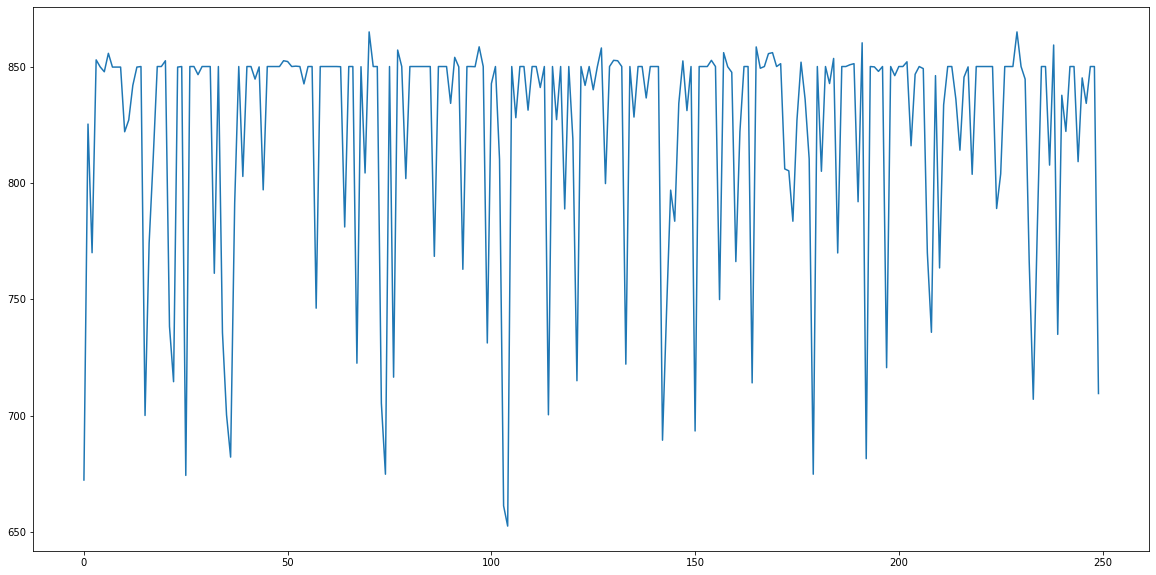

In [13]:
plt.figure(figsize=(20,10))
plt.plot(total_reward_list)
plt.show()

## Eating Plan Sequence Generation
Note: The sequence changes on every run and is expected behavior since the first food item is randomly selected.

In [14]:

uneaten = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U']
action = uneaten[random.randint(0, len(uneaten)-1)]
uneaten.remove(action)
state = action

print("Day 1 Eating Plan")
print("")

c_food = data[data['Label']==action]
print(c_food.tail(1)['Food'].values[0])

count = 2

for i in range (20):
    index = 0
    highestValue = 0
    for j in range (len(uneaten)):
        temp_state = state
        temp_state += uneaten[j]
        if temp_state in qtable.keys():
            if qtable[temp_state] > highestValue:
                index = j
                highestValue = qtable[temp_state]      
                
    if (i+1) % 3 == 0:
        print("")
        print("Day", count, "Eating Plan")
        print("")
        count += 1
    action = uneaten[index]
    c_food = data[data['Label']==action]
    print(c_food.tail(1)['Food'].values[0])
    state += action
    uneaten.remove(action)



Day 1 Eating Plan

Fried Hokkien Noodles
Braised Duck With Yam Rice
Ee Mee Seafood (Fried)

Day 2 Eating Plan

Ngoh Hiang Mixed Items
Fried Hong Kong Noodles
Laksa

Day 3 Eating Plan

Ipoh Horfun
Chicken Teriyaki Don
Fish and Chips

Day 4 Eating Plan

Lor Mee
Fried Carrot Cake
Roti Prata with Egg (2 pieces)

Day 5 Eating Plan

Shrimp Fried Rice
Nasi Lemak
Pork Satay with Sauce (10 sticks)

Day 6 Eating Plan

Fried Beehoon
Tau Suan
Pizza (2 slices)

Day 7 Eating Plan

Carbonara
Butter Crab (500 gram)
Mac and Cheese
